In [47]:
import requests
import rasterio

# Define the API URL and parameters
url = "https://noise.discomap.eea.europa.eu/arcgis/rest/services/noiseStoryMap/NoiseContours_air_lden/ImageServer/exportImage"
params = {
    "bbox":"4095413.1894855704,2286870.1853875336,4096413.1894855704,2287870.1853875336",
    "bboxSR":"3035",
    "size": "800,600",       # Output resolution
    "format": "png",        # Request GeoTIFF
    "f": "image"             # Response type
}

# Fetch the GeoTIFF file
response = requests.get(url, params=params)
if response.status_code == 200:
    with open("noise_contour.png", "wb") as f:
        f.write(response.content)
    print("GeoTIFF saved successfully.")

    # Open the GeoTIFF and read pixel values
    with rasterio.open("noise_contour.tiff") as dataset:
        data = dataset.read(1)  # Read the first band
        print("Pixel values:\n", data)
else:
    print(f"Failed to fetch data: {response.status_code}")


GeoTIFF saved successfully.
Pixel values:
 [[15 15 15 ...  4  4  4]
 [15 15 15 ...  4  4  4]
 [15 15 15 ...  4  4  4]
 ...
 [ 5  5  5 ...  1  1  1]
 [ 5  5  5 ...  1  1  1]
 [ 5  5  5 ...  1  1  1]]


In [49]:
import rasterio

with rasterio.open('noise_contour.tiff') as src:
    print("Raster Bands:", src.count)  # Number of bands
    print("Unique Pixel Values:", set(src.read(1).flatten()))  # Unique values in the first band


Raster Bands: 1
Unique Pixel Values: {1, 2, 3, 4, 5, 15}


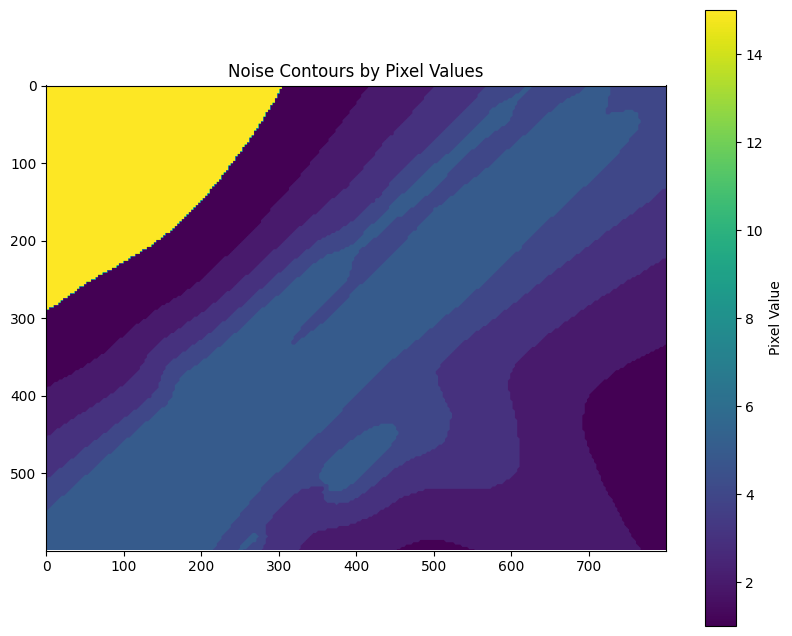

In [50]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

with rasterio.open('noise_contour.tiff') as src:
    data = src.read(1)  # Read the first band

plt.figure(figsize=(10, 8))
plt.title("Noise Contours by Pixel Values")
plt.imshow(data, cmap='viridis')  # Or use custom colormaps matching your legend
plt.colorbar(label='Pixel Value')
plt.show()


In [51]:
data

array([[15, 15, 15, ...,  4,  4,  4],
       [15, 15, 15, ...,  4,  4,  4],
       [15, 15, 15, ...,  4,  4,  4],
       ...,
       [ 5,  5,  5, ...,  1,  1,  1],
       [ 5,  5,  5, ...,  1,  1,  1],
       [ 5,  5,  5, ...,  1,  1,  1]], dtype=uint8)

In [45]:
from pyproj import Transformer

# Initialize the transformer for EPSG:4326 to EPSG:3035
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3035", always_xy=True)

# Input coordinates in decimal degrees
longitude = 7.215861  # Longitude in EPSG:4326
latitude = 43.657722  # Latitude in EPSG:4326

# Transform the coordinates to EPSG:3035
x_3035, y_3035 = transformer.transform(longitude, latitude)

x_3035, y_3035


(4095913.1894855704, 2287370.1853875336)

In [46]:
def create_bounding_box(center_x, center_y, buffer_meters):
    """
    Creates a bounding box around a center point with a specified buffer.

    Parameters:
        center_x (float): X coordinate of the center point.
        center_y (float): Y coordinate of the center point.
        buffer_meters (float): Buffer distance in meters.

    Returns:
        tuple: Bounding box as (min_x, min_y, max_x, max_y).
    """
    min_x = center_x - buffer_meters
    max_x = center_x + buffer_meters
    min_y = center_y - buffer_meters
    max_y = center_y + buffer_meters
    
    return min_x, min_y, max_x, max_y

create_bounding_box(x_3035, y_3035, 500)

(4095413.1894855704,
 2286870.1853875336,
 4096413.1894855704,
 2287870.1853875336)